# EX2_1
build dilate and erode functions


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10, 10)



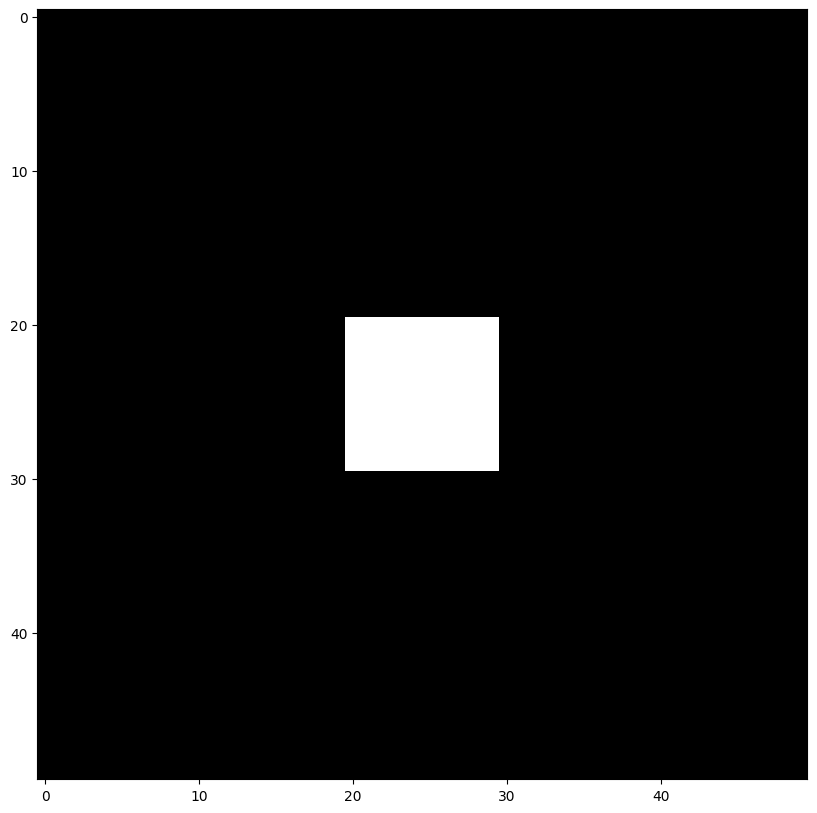

In [7]:

img = np.zeros((50, 50))
img[20:30, 20:30] = 1

plt.figure(figsize=figsize)
plt.imshow(img,cmap="gray")
plt.show()



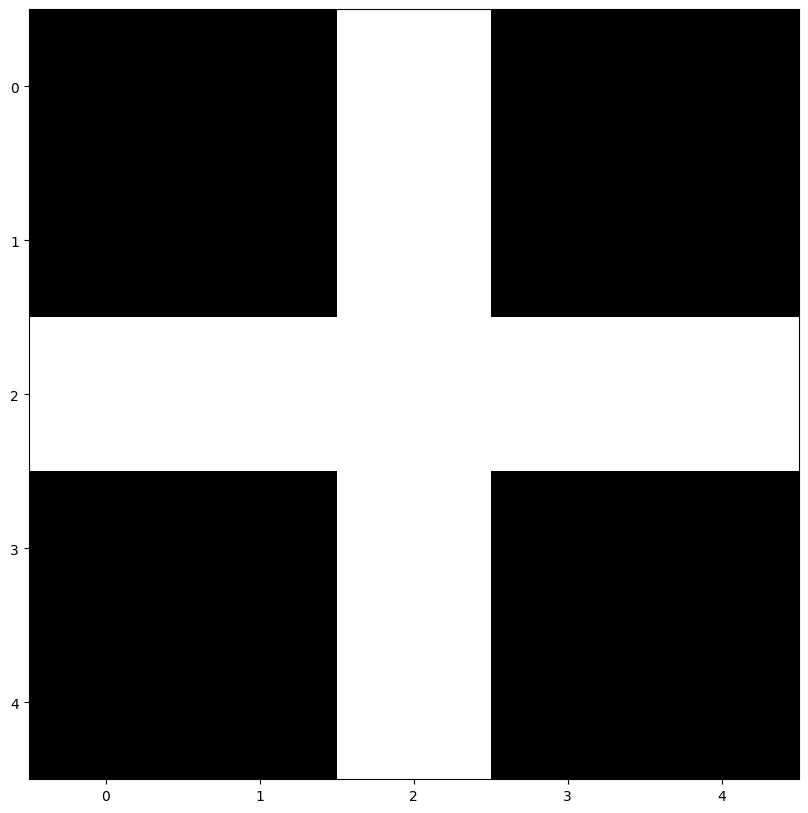

In [8]:
kernel = np.zeros((5,5),dtype=np.uint8)
kernel[2,:] = 1
kernel[:,2] = 1


plt.figure(figsize=figsize)
plt.imshow(kernel,cmap="gray")
plt.show()



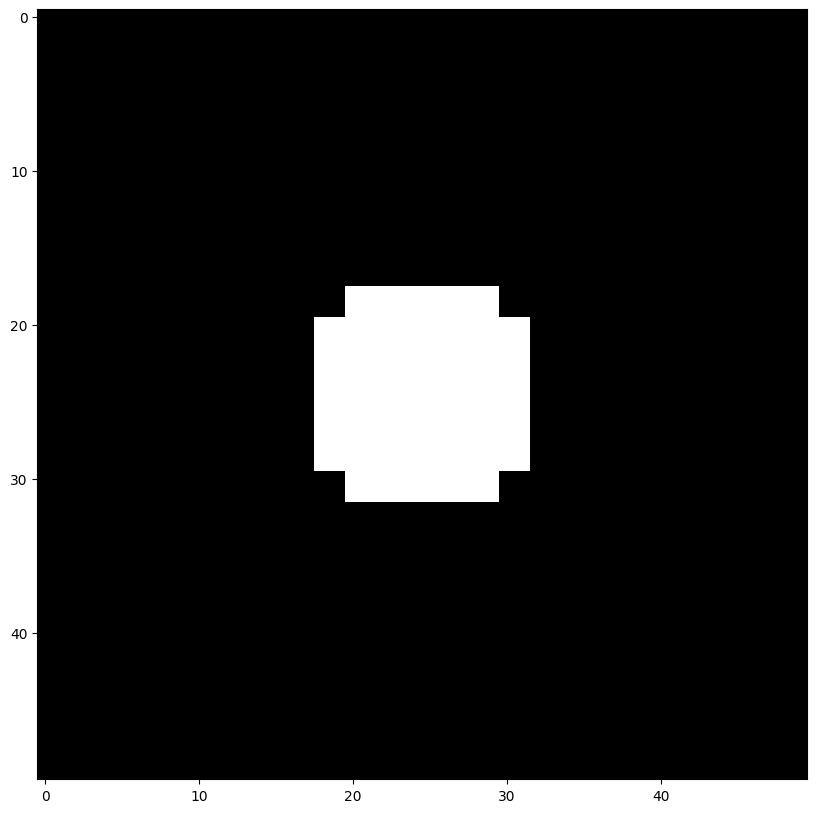

In [19]:
def my_dilate(img,kernel):
    #TODO: build dilate function without cv2.dilate
     # Get the size of the kernel
    kernel_size = kernel.shape
    # Calculate the center of the kernel
    kernel_center = (kernel_size[0] // 2, kernel_size[1] // 2)
    # Initialize the result image
    dilated_img = np.zeros(img.shape)

    # Iterate through each pixel in the input image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Initialize the maximum value
            max_value = 0
            # Iterate through each element in the kernel
            for k in range(kernel_size[0]):
                for l in range(kernel_size[1]):
                    # Check if the kernel element is active (1)
                    if kernel[k, l] == 1:
                        # Calculate the coordinates in the input image
                        ni, nj = i + k - kernel_center[0], j + l - kernel_center[1]
                        # Check if the coordinates are within the image boundaries
                        if 0 <= ni < img.shape[0] and 0 <= nj < img.shape[1]:
                            # Update the maximum value based on the input image
                            max_value = max(max_value, img[ni, nj])
            # Set the dilated value for the current pixel
            dilated_img[i, j] = max_value
    
    return dilated_img


plt.figure(figsize=figsize)
dilatt = my_dilate(img,kernel)
plt.imshow(dilatt,cmap="gray")
#plt.imshow(my_dilate(img,kernel),cmap="gray")
plt.show()



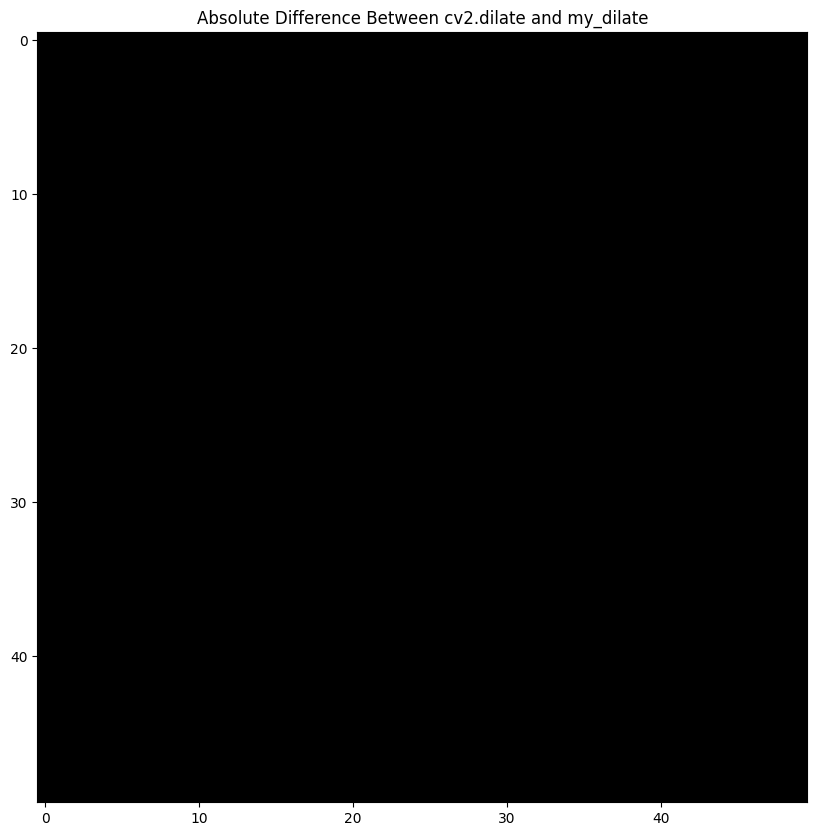

cv2.dilate & my_dilate are the same!


In [25]:
# TODO: show that cv2.dilate and my_dilate are the same using absolute difference
cv2_kernel = np.uint8(kernel)
cv2_dilated = cv2.dilate(img, cv2_kernel)

# Calculate the absolute difference between cv2.dilate and my_dilate results
difference = cv2.absdiff(cv2_dilated, dilatt)

# Display the absolute difference between the two dilation methods
plt.figure(figsize=(10, 10))
plt.imshow(difference, cmap='gray')
plt.title("Absolute Difference Between cv2.dilate and my_dilate")
plt.show()

# Check if the absolute difference is zero for all pixels
if (difference == 0).all():
    print("cv2.dilate & my_dilate are the same!")
else: 
    print("try again...")



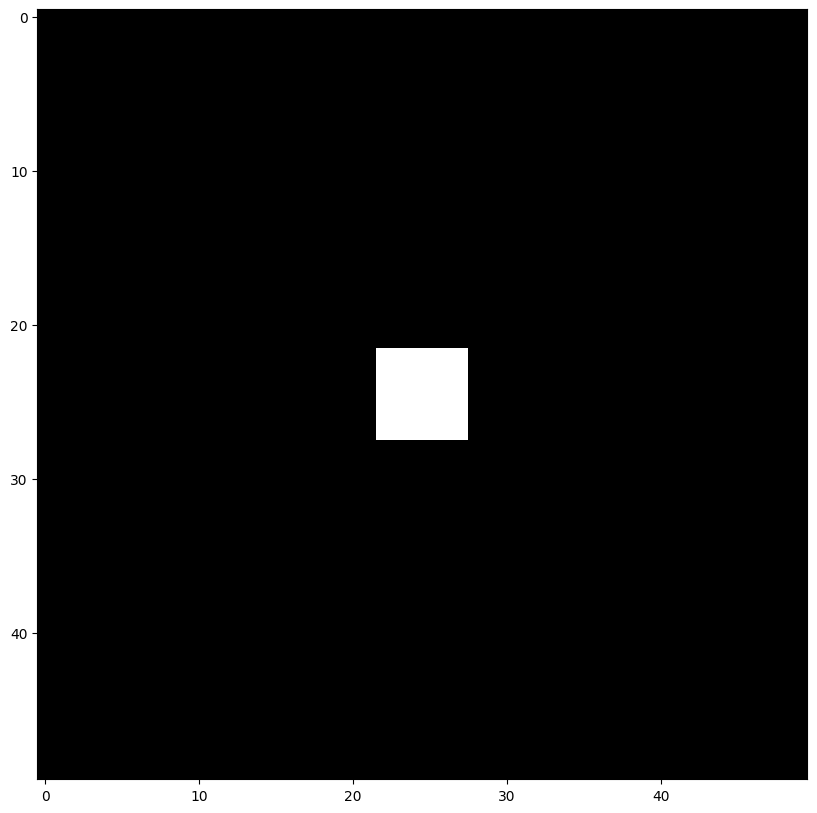

In [26]:
def my_erode(img,kernel):
    #TODO: build erode function without cv2.erode
    # Get the size of the kernel
    kernel_size = kernel.shape
    # Calculate the center of the kernel
    kernel_center = (kernel_size[0] // 2, kernel_size[1] // 2)
    # Initialize the result image
    eroded_img = np.zeros(img.shape)

    # Iterate through each pixel in the input image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Initialize the minimum value
            min_value = 1
            # Iterate through each element in the kernel
            for k in range(kernel_size[0]):
                for l in range(kernel_size[1]):
                    # Check if the kernel element is active (1)
                    if kernel[k, l] == 1:
                        # Calculate the coordinates in the input image
                        ni, nj = i + k - kernel_center[0], j + l - kernel_center[1]
                        # Check if the coordinates are within the image boundaries
                        if 0 <= ni < img.shape[0] and 0 <= nj < img.shape[1]:
                            # Update the minimum value based on the input image
                            min_value = min(min_value, img[ni, nj])
            # Set the eroded value for the current pixel
            eroded_img[i, j] = min_value

    return eroded_img


plt.figure(figsize=figsize)
erodee = my_erode(img,kernel)
plt.imshow(erodee,cmap="gray")
plt.show()



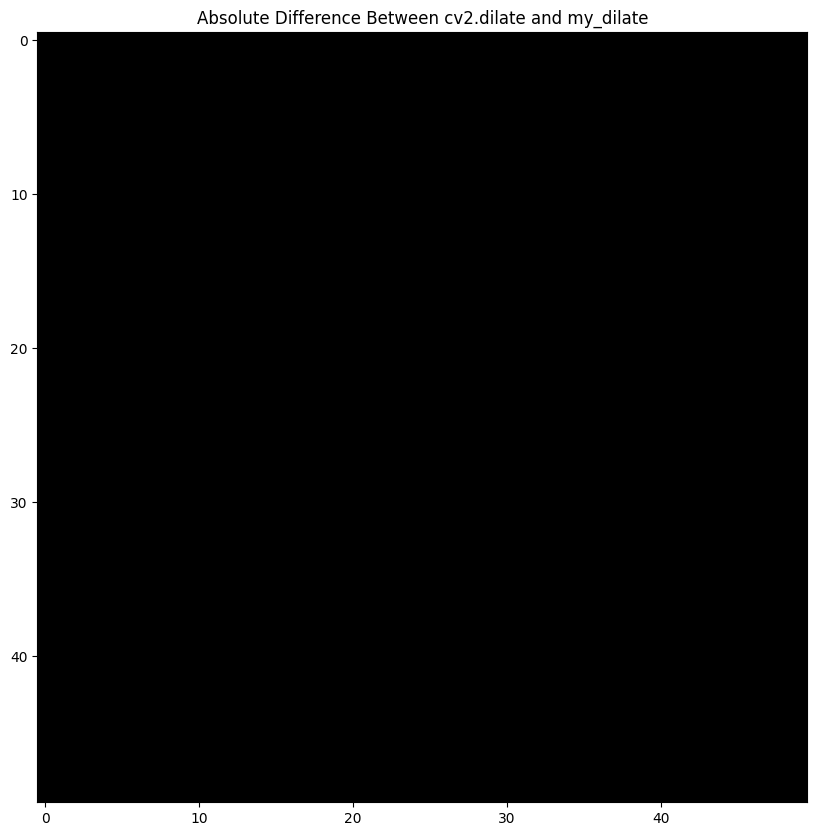

cv2.erode & my_erode are the same!


In [27]:
# TODO: show that cv2.erode and my_erode are the same using absolute difference
cv2_kernel = np.uint8(kernel)
cv2_eroded = cv2.erode(img, cv2_kernel)
new_eroded = my_erode(img, kernel)

difference = cv2.absdiff(cv2_eroded, new_eroded)

plt.figure(figsize=(10, 10))
plt.imshow(difference, cmap='gray')
plt.title("Absolute Difference Between cv2.dilate and my_dilate")
plt.show()

if (difference == 0).all(): 
    print("cv2.erode & my_erode are the same!")
else: 
    print("try again...")

